In [2]:
# Import all relevant Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set()

In [3]:
# Create a dataframe by reading the JSON file using Pandas
business = pd.read_json('yelp_academic_dataset_business.json', lines=True)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
business.drop('hours', axis = 1, inplace = True)
business.drop('attributes', axis = 1, inplace = True)
business.drop('categories', axis = 1, inplace = True)
business.drop('is_open', axis = 1, inplace = True)
business.drop('postal_code', axis = 1, inplace = True)
business.drop('address', axis = 1, inplace = True)
business.head()

,business_id,name,city,state,latitude,longitude,stars,review_count
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,34.426679,-119.711197,5.0,7
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,38.551126,-90.335695,3.0,15
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,32.223236,-110.880452,3.5,22
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,39.955505,-75.155564,4.0,80
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,40.338183,-75.471659,4.5,13


In [5]:
# Group the data by state and calculate the total reviews and average rating
state_summary = business.groupby('state',as_index=False).agg({'business_id': 'count','review_count': 'sum', 'stars': 'mean'})
# Rename Columns for better readability and understanding
state_summary = state_summary.rename(columns={
    'business_id': 'total_businesses',
    'review_count': 'total_reviews',
    'stars': 'average_rating'})

In [6]:
# Sort the state_summary DataFrame by average_rating in descending order
state_summary = state_summary.sort_values(by='average_rating', ascending=False)
state_summary.reset_index(inplace=True, drop=True)
print(state_summary)

   state  total_businesses  total_reviews  average_rating
0     MT                 1              6        5.000000
1     VT                 1             10        4.500000
2     UT                 1             19        4.500000
3     SD                 1             42        4.500000
4     HI                 2             32        4.250000
5    XMS                 1              5        4.000000
6     CO                 3             30        4.000000
7     CA              5203         339637        3.996733
8     NV              7715         409950        3.736876
9     ID              4467         152086        3.707634
10    LA              9924         743176        3.679162
11    FL             26330        1119926        3.610957
12    AZ              9912         412639        3.592010
13    IN             11247         472565        3.588246
14    PA             34039        1540790        3.573019
15    TN             12056         598195        3.571500
16    MO      

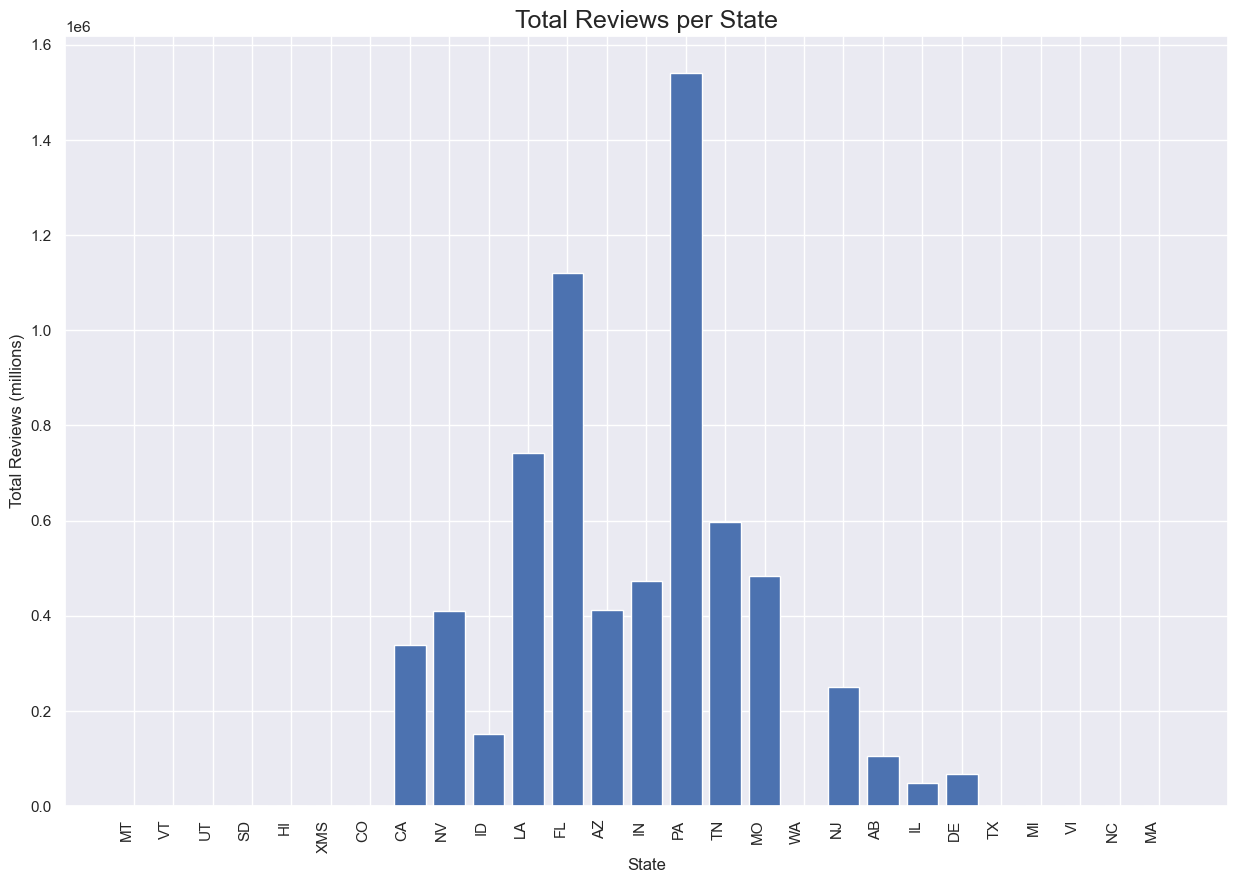

In [7]:
# Plot the number of customer reviews per state as a bar graph
plt.figure(figsize=(15,10))
plt.bar(state_summary['state'], state_summary['total_reviews'])
plt.xlabel('State')
plt.ylabel('Total Reviews (millions)')
plt.title('Total Reviews per State', fontsize = 18)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [8]:
# Check for any correlation between the number of reviews (independent variable) and the stars (dependent variable)
import statsmodels.api as sm

In [9]:
x1 = business[['review_count']]
y = business['stars']

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     540.9
Date:                Thu, 01 Aug 2024   Prob (F-statistic):          1.92e-119
Time:                        13:47:04   Log-Likelihood:            -2.0917e+05
No. Observations:              150346   AIC:                         4.183e+05
Df Residuals:                  150344   BIC:                         4.184e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.5751      0.003   1336.427      0.000       3.570       3.580
review_count     0.0005   2.07e-05     23.258      0.000       0.000       0.001
==============================================================================
Omnibus:                     7529.581   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7641.902
Skew:                          -0.514   Prob(JB):                         0.00
Kurtosis:                       2.596   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Little to no correlation between the number of reviews and avarage star rating for each business as shown by: Adjusted R squared value only 0.004, 
# Coefficient of review_count is only 0.0005 

In [12]:
shapefile_path = r'C:\Users\Zohaib\Downloads\tl_2023_us_state\tl_2023_us_state.shp'
us_map = gpd.read_file(shapefile_path)
us_map

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,"POLYGON ((-75.756 39.24607, -75.75578 39.24334..."
5,1,1,44,01219835,44,0400000US44,RI,Rhode Island,00,G4000,A,2677763372,1323686976,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,0400000US16,ID,Idaho,00,G4000,A,214049886849,2391614331,+44.3484222,-114.5588538,"POLYGON ((-116.35844 49.00047, -116.34805 49.0..."
7,1,1,33,01779794,33,0400000US33,NH,New Hampshire,00,G4000,A,23190126365,1025956733,+43.6727945,-071.5841886,"POLYGON ((-70.83887 43.24449, -70.83886 43.244..."
8,3,5,37,01027616,37,0400000US37,NC,North Carolina,00,G4000,A,125935880061,13453540851,+35.5397100,-079.1308636,"POLYGON ((-77.89977 36.5446, -77.89942 36.5446..."
9,1,1,50,01779802,50,0400000US50,VT,Vermont,00,G4000,A,23872589127,1030648383,+44.0589536,-072.6710173,"POLYGON ((-72.04187 44.15665, -72.0418 44.1566..."


In [13]:
# Ensure the state column matches
us_map = us_map.rename(columns={'STUSPS': 'state'})

In [14]:
# Merge state business counts with GeoDataFrame
us_map = us_map.merge(state_summary, on='state', how='left').fillna(0)

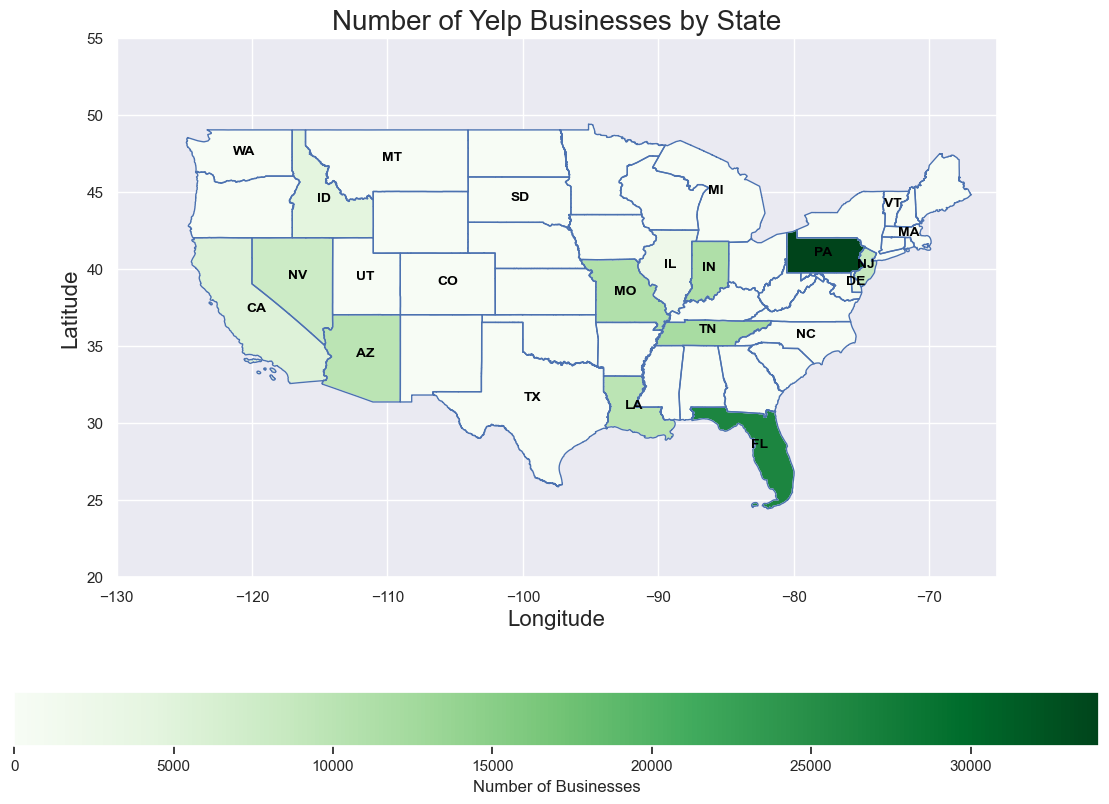

In [15]:
# Adjust figure size
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  
us_map.boundary.plot(ax=ax, linewidth=1)

# Plot the heatmap
us_map.plot(column='total_businesses', ax=ax, legend=True,
            legend_kwds={'label': "Number of Businesses",
                         'orientation': "horizontal"},
            cmap='Greens', missing_kwds={"color": "lightgrey"})

# Add state labels only for states with data
for idx, row in us_map.iterrows():
    if row['total_businesses'] > 0:  # Check if the state has data
        plt.annotate(text=row['state'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=10, color='black', weight='bold')

plt.ylabel('Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=16)
plt.ylim(20, 55)
plt.xlim(-130, -65)
plt.title('Number of Yelp Businesses by State', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Average Yelp Rating by State')

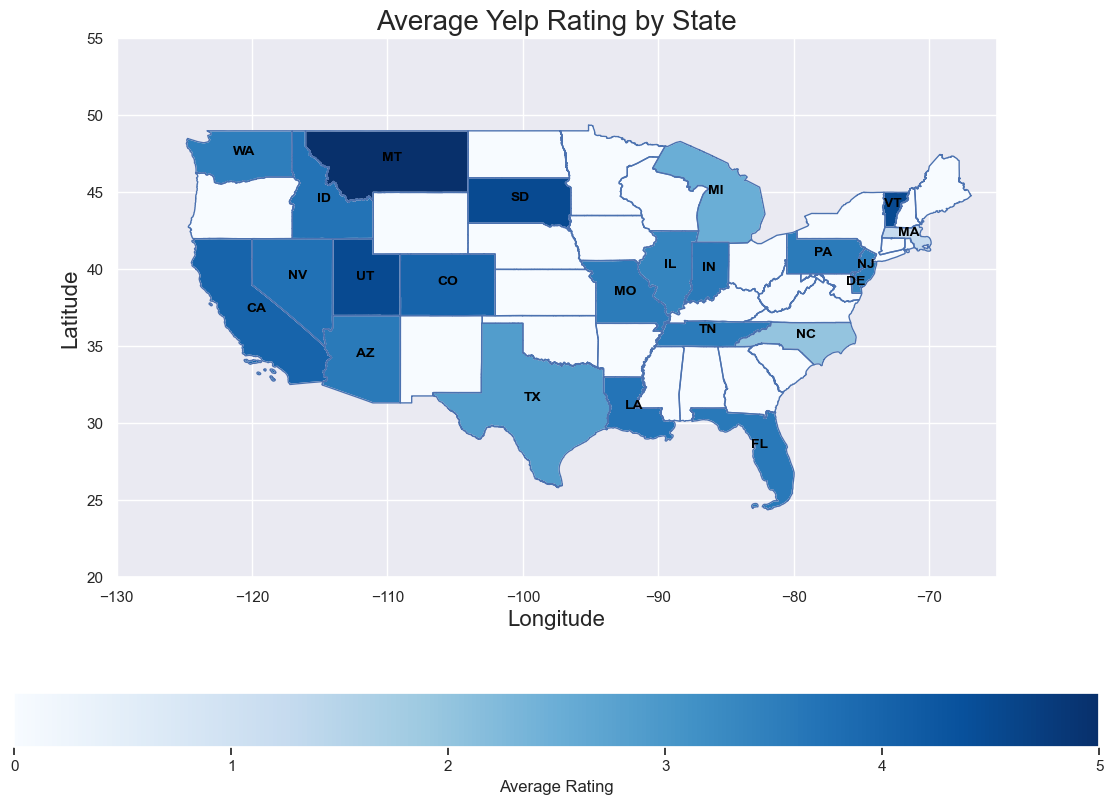

In [16]:
# Adjust figure size
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
us_map.boundary.plot(ax=ax, linewidth=1)

# Plot the heatmap
us_map.plot(column='average_rating', ax=ax, legend=True,
            legend_kwds={'label': "Average Rating",
                         'orientation': "horizontal"},
            cmap='Blues', missing_kwds={"color": "lightgrey"})

# Add state labels only for states with data
for idx, row in us_map.iterrows():
    if row['total_businesses'] > 0:  # Check if the state has data
        plt.annotate(text=row['state'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=10, color='black', weight='bold')

plt.ylabel('Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=16)
plt.ylim(20, 55)
plt.xlim(-130, -65)
plt.title('Average Yelp Rating by State', fontsize=20)

In [17]:
state_summary.sort_values(by = 'total_businesses', ascending = False, inplace = True)

In [18]:
state_summary

,state,total_businesses,total_reviews,average_rating
14,PA,34039,1540790,3.573019
11,FL,26330,1119926,3.610957
15,TN,12056,598195,3.571500
13,IN,11247,472565,3.588246
16,MO,10913,483897,3.546092
10,LA,9924,743176,3.679162
12,AZ,9912,412639,3.592010
18,NJ,8536,249837,3.459114
8,NV,7715,409950,3.736876
19,AB,5573,105477,3.447515


In [19]:
from matplotlib.ticker import ScalarFormatter

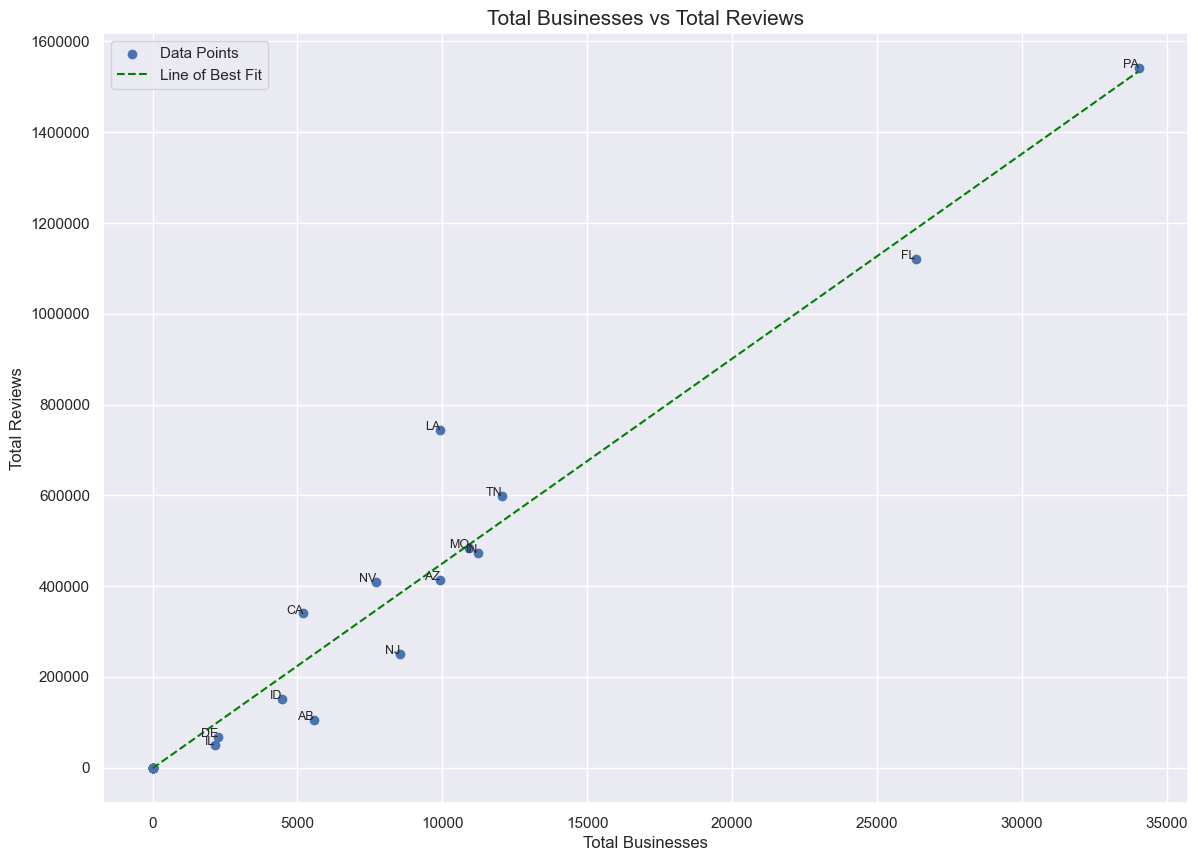

In [20]:
# Filter out None values
filtered_data = [(state_summary['total_businesses'][i], state_summary['total_reviews'][i])
                 for i in range(len(state_summary['state']))
                 if state_summary['total_businesses'][i] is not None and state_summary['total_reviews'][i] is not None]

total_businesses = np.array([x[0] for x in filtered_data])
total_reviews = np.array([x[1] for x in filtered_data])

# Create the figure and increase the width
plt.figure(figsize=(14, 10))  # width is 14 inches, height is 10 inches

# Create the scatter plot
plt.scatter(total_businesses, total_reviews, label='Data Points')

# Calculate the line of best fit
slope, intercept = np.polyfit(total_businesses, total_reviews, 1)
line_x = np.linspace(min(total_businesses), max(total_businesses), 100)
line_y = slope * line_x + intercept

# Plot the line of best fit
plt.plot(line_x, line_y, color='green', linestyle='--', label='Line of Best Fit')

# Set the ScalarFormatter to format tick labels as proper numbers
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

# Apply the formatter to both x and y axes
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels for each point
for i in range(len(state_summary['state'])):
    if state_summary['total_businesses'][i] > 100 and state_summary['total_reviews'][i] > 100:
        plt.text(state_summary['total_businesses'][i], state_summary['total_reviews'][i], state_summary['state'][i],
                 fontsize=9, ha='right')

plt.xlabel('Total Businesses')
plt.ylabel('Total Reviews')
plt.title('Total Businesses vs Total Reviews', fontsize=15)
plt.legend()

# Display the plot
plt.show()

In [22]:
# Linear relationship between number of businesses and reviews by state

In [23]:
# States below the line have businesses with comparitively less reviews, should incentivize/encourage customers to leave more reviews. 

In [33]:
state_summary['reviews/businesses_ratio'] = (state_summary['total_reviews']/state_summary['total_businesses']).round(2)
state_summary['average_rating'] = state_summary['average_rating'].round(2)

In [37]:
columns = ['state', 'total_businesses', 'total_reviews', 'reviews/businesses_ratio', 'average_rating']
state_summary = state_summary[columns]
state_summary.sort_values(by = 'reviews/businesses_ratio', ascending = False)

,state,total_businesses,total_reviews,reviews/businesses_ratio,average_rating
10,LA,9924,743176,74.89,3.68
7,CA,5203,339637,65.28,4.00
8,NV,7715,409950,53.14,3.74
15,TN,12056,598195,49.62,3.57
14,PA,34039,1540790,45.27,3.57
16,MO,10913,483897,44.34,3.55
11,FL,26330,1119926,42.53,3.61
13,IN,11247,472565,42.02,3.59
3,SD,1,42,42.00,4.50
12,AZ,9912,412639,41.63,3.59


In [40]:
# Los Angeles, California, and Nevada have the best reviews/businesses ratio, customers in those states are more likely to leave reviews.